In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import h5py

from keras.preprocessing.image import array_to_img
from keras.models import load_model
from keras.utils import to_categorical

import baseline.visualization as v

C:\Users\wogur\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
hf = h5py.File('../dataset/h5py/train(224, 224, 3)', 'r')
val_imgs = np.array(hf['val_imgs'])
val_labels = np.array(hf['val_labels'])
val_labels = np.argmax(val_labels,axis=1)

In [3]:
class_idx = list()
for i in range(10):
    idx = np.where(val_labels==i)[0]
    np.random.shuffle(idx)
    class_idx.append(idx[:5])

In [4]:
layers = ['conv_7b_ac']
test_idx = [0,1,2,3,4]
class_num = 10

# Grad CAM

In [5]:
model = load_model('../model/Inception_resnetV2_10.h5')

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
mixed_5b (Concatenate)          (None, 25, 25, 320)  0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 25, 25, 32)   10240       mixed_5b[0][0]                   
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 25, 25, 32)   96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
activation_19 (Activation)      (None, 25, 25, 32)   0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 25, 25, 32)   0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
activation_24 (Activation)      (None, 25, 25, 64)   0           batch_normalization_24[0][0]     
__________________________________________________________________________________________________
block35_2_mixed (Concatenate)   (None, 25, 25, 128)  0           activation_19[0][0]              
                                                                 activation_21[0][0]              
                                                                 activation_24[0][0]              
__________

__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 25, 25, 32)   10240       block35_3_ac[0][0]               
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 25, 25, 32)   9216        activation_32[0][0]              
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 25, 25, 64)   27648       activation_35[0][0]              
__________________________________________________________________________________________________
batch_normalization_31 (BatchNo (None, 25, 25, 32)   96          conv2d_31[0][0]                  
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 25, 25, 32)   96          conv2d_33[0][0]                  
__________

__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 25, 25, 32)   10240       block35_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 25, 25, 48)   13824       activation_46[0][0]              
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 25, 25, 32)   96          conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_47 (BatchNo (None, 25, 25, 48)   144         conv2d_47[0][0]                  
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 25, 25, 32)   0           batch_normalization_44[0][0]     
__________

block35_7_conv (Conv2D)         (None, 25, 25, 320)  41280       block35_7_mixed[0][0]            
__________________________________________________________________________________________________
block35_7 (Lambda)              (None, 25, 25, 320)  0           block35_6_ac[0][0]               
                                                                 block35_7_conv[0][0]             
__________________________________________________________________________________________________
block35_7_ac (Activation)       (None, 25, 25, 320)  0           block35_7[0][0]                  
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 25, 25, 32)   10240       block35_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_58 (BatchNo (None, 25, 25, 32)   96          conv2d_58[0][0]                  
__________

batch_normalization_66 (BatchNo (None, 25, 25, 64)   192         conv2d_66[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 25, 25, 32)   0           batch_normalization_61[0][0]     
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 25, 25, 32)   0           batch_normalization_63[0][0]     
__________________________________________________________________________________________________
activation_66 (Activation)      (None, 25, 25, 64)   0           batch_normalization_66[0][0]     
__________________________________________________________________________________________________
block35_9_mixed (Concatenate)   (None, 25, 25, 128)  0           activation_61[0][0]              
                                                                 activation_63[0][0]              
          

batch_normalization_73 (BatchNo (None, 12, 12, 384)  1152        conv2d_73[0][0]                  
__________________________________________________________________________________________________
batch_normalization_76 (BatchNo (None, 12, 12, 384)  1152        conv2d_76[0][0]                  
__________________________________________________________________________________________________
activation_73 (Activation)      (None, 12, 12, 384)  0           batch_normalization_73[0][0]     
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 12, 12, 384)  0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 12, 12, 320)  0           block35_10_ac[0][0]              
__________________________________________________________________________________________________
mixed_6a (

conv2d_86 (Conv2D)              (None, 12, 12, 128)  139264      block17_2_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_86 (BatchNo (None, 12, 12, 128)  384         conv2d_86[0][0]                  
__________________________________________________________________________________________________
activation_86 (Activation)      (None, 12, 12, 128)  0           batch_normalization_86[0][0]     
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 12, 12, 160)  143360      activation_86[0][0]              
__________________________________________________________________________________________________
batch_normalization_87 (BatchNo (None, 12, 12, 160)  480         conv2d_87[0][0]                  
__________________________________________________________________________________________________
activation

conv2d_96 (Conv2D)              (None, 12, 12, 192)  215040      activation_95[0][0]              
__________________________________________________________________________________________________
batch_normalization_93 (BatchNo (None, 12, 12, 192)  576         conv2d_93[0][0]                  
__________________________________________________________________________________________________
batch_normalization_96 (BatchNo (None, 12, 12, 192)  576         conv2d_96[0][0]                  
__________________________________________________________________________________________________
activation_93 (Activation)      (None, 12, 12, 192)  0           batch_normalization_93[0][0]     
__________________________________________________________________________________________________
activation_96 (Activation)      (None, 12, 12, 192)  0           batch_normalization_96[0][0]     
__________________________________________________________________________________________________
block17_5_

__________________________________________________________________________________________________
block17_7 (Lambda)              (None, 12, 12, 1088) 0           block17_6_ac[0][0]               
                                                                 block17_7_conv[0][0]             
__________________________________________________________________________________________________
block17_7_ac (Activation)       (None, 12, 12, 1088) 0           block17_7[0][0]                  
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 12, 12, 128)  139264      block17_7_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_106 (BatchN (None, 12, 12, 128)  384         conv2d_106[0][0]                 
__________________________________________________________________________________________________
activation

batch_normalization_115 (BatchN (None, 12, 12, 160)  480         conv2d_115[0][0]                 
__________________________________________________________________________________________________
activation_115 (Activation)     (None, 12, 12, 160)  0           batch_normalization_115[0][0]    
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 12, 12, 192)  208896      block17_9_ac[0][0]               
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 12, 12, 192)  215040      activation_115[0][0]             
__________________________________________________________________________________________________
batch_normalization_113 (BatchN (None, 12, 12, 192)  576         conv2d_113[0][0]                 
__________________________________________________________________________________________________
batch_norm

activation_124 (Activation)     (None, 12, 12, 192)  0           batch_normalization_124[0][0]    
__________________________________________________________________________________________________
block17_12_mixed (Concatenate)  (None, 12, 12, 384)  0           activation_121[0][0]             
                                                                 activation_124[0][0]             
__________________________________________________________________________________________________
block17_12_conv (Conv2D)        (None, 12, 12, 1088) 418880      block17_12_mixed[0][0]           
__________________________________________________________________________________________________
block17_12 (Lambda)             (None, 12, 12, 1088) 0           block17_11_ac[0][0]              
                                                                 block17_12_conv[0][0]            
__________________________________________________________________________________________________
block17_12

batch_normalization_134 (BatchN (None, 12, 12, 128)  384         conv2d_134[0][0]                 
__________________________________________________________________________________________________
activation_134 (Activation)     (None, 12, 12, 128)  0           batch_normalization_134[0][0]    
__________________________________________________________________________________________________
conv2d_135 (Conv2D)             (None, 12, 12, 160)  143360      activation_134[0][0]             
__________________________________________________________________________________________________
batch_normalization_135 (BatchN (None, 12, 12, 160)  480         conv2d_135[0][0]                 
__________________________________________________________________________________________________
activation_135 (Activation)     (None, 12, 12, 160)  0           batch_normalization_135[0][0]    
__________________________________________________________________________________________________
conv2d_133

batch_normalization_141 (BatchN (None, 12, 12, 192)  576         conv2d_141[0][0]                 
__________________________________________________________________________________________________
batch_normalization_144 (BatchN (None, 12, 12, 192)  576         conv2d_144[0][0]                 
__________________________________________________________________________________________________
activation_141 (Activation)     (None, 12, 12, 192)  0           batch_normalization_141[0][0]    
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 12, 12, 192)  0           batch_normalization_144[0][0]    
__________________________________________________________________________________________________
block17_17_mixed (Concatenate)  (None, 12, 12, 384)  0           activation_141[0][0]             
                                                                 activation_144[0][0]             
__________

                                                                 block17_19_conv[0][0]            
__________________________________________________________________________________________________
block17_19_ac (Activation)      (None, 12, 12, 1088) 0           block17_19[0][0]                 
__________________________________________________________________________________________________
conv2d_154 (Conv2D)             (None, 12, 12, 128)  139264      block17_19_ac[0][0]              
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, 12, 12, 128)  384         conv2d_154[0][0]                 
__________________________________________________________________________________________________
activation_154 (Activation)     (None, 12, 12, 128)  0           batch_normalization_154[0][0]    
__________________________________________________________________________________________________
conv2d_155

mixed_7a (Concatenate)          (None, 5, 5, 2080)   0           activation_158[0][0]             
                                                                 activation_160[0][0]             
                                                                 activation_163[0][0]             
                                                                 max_pooling2d_4[0][0]            
__________________________________________________________________________________________________
conv2d_165 (Conv2D)             (None, 5, 5, 192)    399360      mixed_7a[0][0]                   
__________________________________________________________________________________________________
batch_normalization_165 (BatchN (None, 5, 5, 192)    576         conv2d_165[0][0]                 
__________________________________________________________________________________________________
activation_165 (Activation)     (None, 5, 5, 192)    0           batch_normalization_165[0][0]    
__________

__________________________________________________________________________________________________
activation_174 (Activation)     (None, 5, 5, 224)    0           batch_normalization_174[0][0]    
__________________________________________________________________________________________________
conv2d_172 (Conv2D)             (None, 5, 5, 192)    399360      block8_2_ac[0][0]                
__________________________________________________________________________________________________
conv2d_175 (Conv2D)             (None, 5, 5, 256)    172032      activation_174[0][0]             
__________________________________________________________________________________________________
batch_normalization_172 (BatchN (None, 5, 5, 192)    576         conv2d_172[0][0]                 
__________________________________________________________________________________________________
batch_normalization_175 (BatchN (None, 5, 5, 256)    768         conv2d_175[0][0]                 
__________

__________________________________________________________________________________________________
block8_5_mixed (Concatenate)    (None, 5, 5, 448)    0           activation_180[0][0]             
                                                                 activation_183[0][0]             
__________________________________________________________________________________________________
block8_5_conv (Conv2D)          (None, 5, 5, 2080)   933920      block8_5_mixed[0][0]             
__________________________________________________________________________________________________
block8_5 (Lambda)               (None, 5, 5, 2080)   0           block8_4_ac[0][0]                
                                                                 block8_5_conv[0][0]              
__________________________________________________________________________________________________
block8_5_ac (Activation)        (None, 5, 5, 2080)   0           block8_5[0][0]                   
__________

__________________________________________________________________________________________________
activation_193 (Activation)     (None, 5, 5, 192)    0           batch_normalization_193[0][0]    
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (None, 5, 5, 224)    129024      activation_193[0][0]             
__________________________________________________________________________________________________
batch_normalization_194 (BatchN (None, 5, 5, 224)    672         conv2d_194[0][0]                 
__________________________________________________________________________________________________
activation_194 (Activation)     (None, 5, 5, 224)    0           batch_normalization_194[0][0]    
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 5, 5, 192)    399360      block8_7_ac[0][0]                
__________

__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 5, 5, 256)    768         conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_200 (Activation)     (None, 5, 5, 192)    0           batch_normalization_200[0][0]    
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 5, 5, 256)    0           batch_normalization_203[0][0]    
__________________________________________________________________________________________________
block8_10_mixed (Concatenate)   (None, 5, 5, 448)    0           activation_200[0][0]             
                                                                 activation_203[0][0]             
__________________________________________________________________________________________________
block8_10_

In [7]:
class_grad_cams = list()
for i in range(class_num):
    print('='*100)
    grad_cams = v.create_grad_cam(model=model,
                                  layer_indices=layers,
                                  imgs=val_imgs[class_idx[i]],
                                  class_index=i,
                                  test_idx=test_idx)
    class_grad_cams.append(grad_cams)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.65s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.51s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.37s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.36s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.32s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.36s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.38s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.47s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.67s/it]


# Validation

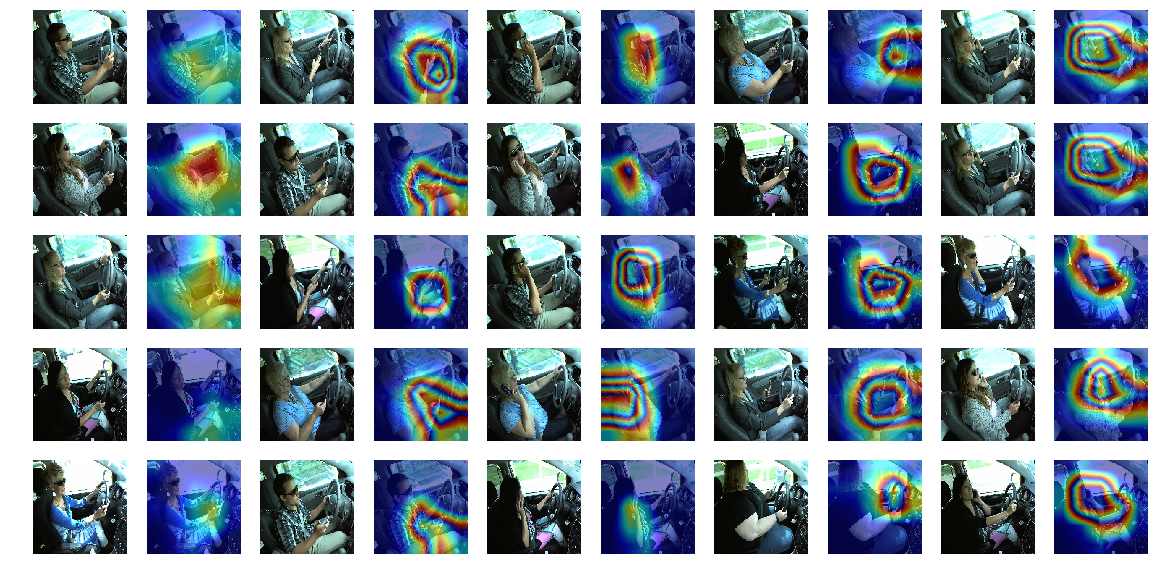

In [17]:
f, ax = plt.subplots(5,10, figsize=(20,10))
for i in test_idx:
    for j in range(5):
        ax[i%5, j*2+0].imshow(array_to_img(val_imgs[class_idx[j][i]]))
        ax[i%5, j*2+1].imshow(array_to_img(class_grad_cams[j][i][0]))
        ax[i%5, j*2+0].axis('off')
        ax[i%5, j*2+1].axis('off')

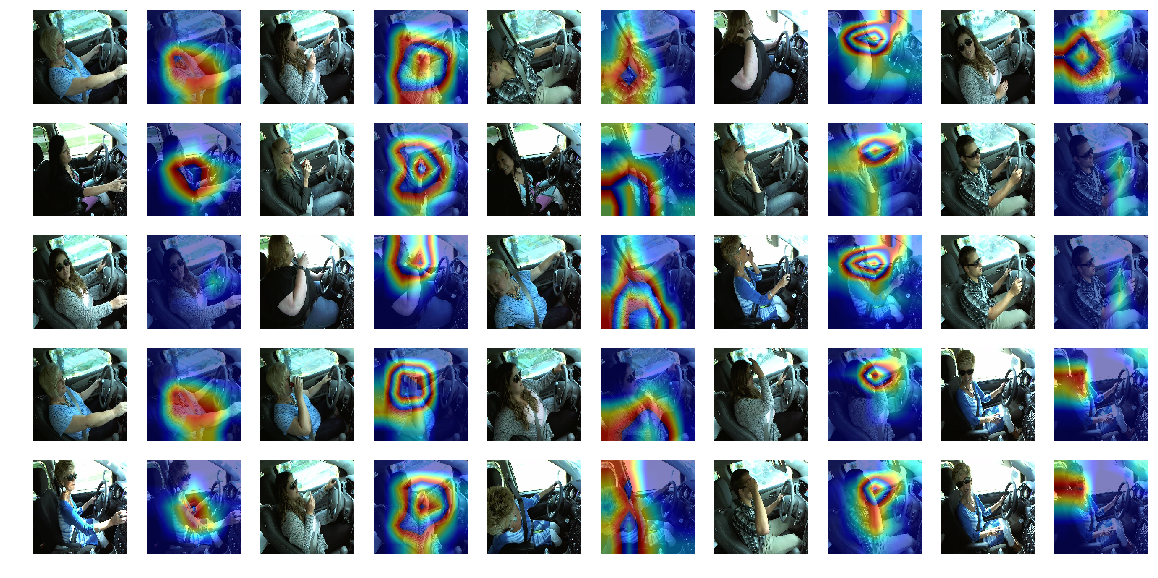

In [19]:
f, ax = plt.subplots(5,10, figsize=(20,10))
for i in test_idx:
    for j in range(5):
        ax[i%5, j*2+0].imshow(array_to_img(val_imgs[class_idx[j+5][i]]))
        ax[i%5, j*2+1].imshow(array_to_img(class_grad_cams[j+5][i][0]))
        ax[i%5, j*2+0].axis('off')
        ax[i%5, j*2+1].axis('off')